In [1]:
from IPython.display import display, clear_output, Image
import time
import cv2
from picamera2 import Picamera2

# 이미지 크기를 설정하기 위한 너비와 높이 정의
width = 640
height = 480

# Picamera2 객체 생성
picam2 = Picamera2()

# 카메라 미리보기 설정 구성
# 'main' 스트림의 포맷은 RGB888, 크기는 위에서 정의한 (width, height)
picam2.configure(picam2.create_preview_configuration(main={"format": "RGB888", "size": (width, height)}))

# 카메라 시작
picam2.start()

[0:38:48.627959518] [4272]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:38:48.635819758] [4315]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:38:48.645151369] [4315]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[0:38:48.646655795] [4272]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:38:48.654384518] [4318]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:38:48.664088314] [4318]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[0:38:48.666594814] [4272]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[0:38:48.667252295] [4272]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-RGB888 (1) 640x48

In [2]:
def camera(play_time=3):
    start_time = time.time()  # 시작 시간 기록
    while time.time() - start_time < play_time:  # 시간 경과 확인
        # 프레임 읽기
        frame = picam2.capture_array()  # 프레임 캡처
        frame = cv2.rotate(frame, cv2.ROTATE_180)  # 회전 처리

        # JPG 포맷으로 인코딩
        _, buffer = cv2.imencode('.jpg', frame)  # JPG 변환

        # 현재 프레임을 표시
        clear_output(wait=True)  # 화면 정리
        display(Image(data=buffer.tobytes(), width=600))  # 이미지 출력

        time.sleep(0.01)  # 짧은 지연

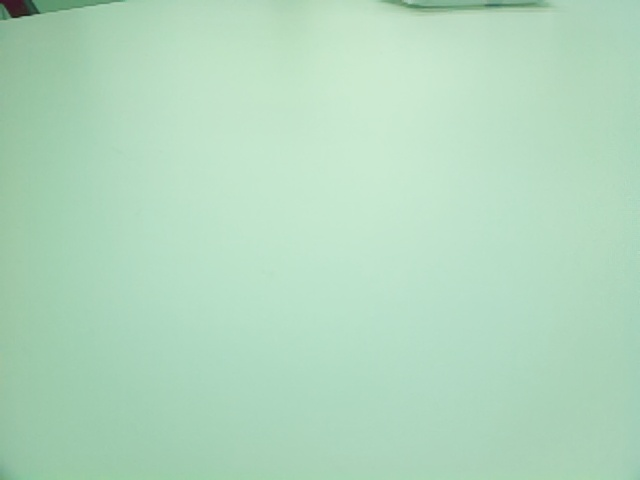

In [3]:
play_time = 5
camera(play_time) #5초 실행